In [139]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Audio
from sklearn.metrics.pairwise import cosine_similarity
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

In [140]:
# load matched audio file
csv = 'data/knockdata_all.csv'

df = pd.read_csv(csv)

df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(2)

,filename,label
0,oagvqxyqxz.wav,1
1,tkaorzfyzc.wav,1


In [141]:
# drop rows where label string more than 3 characters
df = df[df['label'].str.len() <= 3]

In [142]:
# select random number from label column
number = df['label'].sample(1).values[0]
number = str(202)

In [143]:
# get three filenames where label is equal to random number

password_df = df[df['label'] == number]
password_df.head(3)

,filename,label
70,hescmblism.wav,202
71,ieczqropvh.wav,202
72,jgfduietfe.wav,202


In [144]:
def get_features(x, sr, plot = False):
    poly_features=librosa.feature.poly_features(x) #order 1 by default
    features = poly_features[1]

    features = (features - features.min()) / (features.max() - features.min())

    if plot:
        plt.figure(figsize=(14, 5))
        plt.plot(features)
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.show()
    # if val inn norm is > 2, set to 1, else  0
    # Everything over 2000 hertz gets set to 1

    # normaize values 

    features_array = features > .5
    features_array = features_array.astype(int)

    # find changes from 0 to 1
    features_array = np.diff(features_array)
    # find indices where changes occur
    features_array = np.where(features_array == 1)[0]

    difference_array = np.diff(features_array)
    
    return difference_array

hescmblism.wav


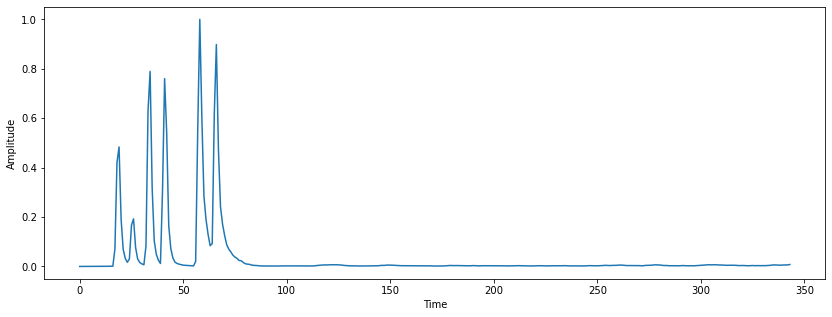

[ 8 16  8]
ieczqropvh.wav


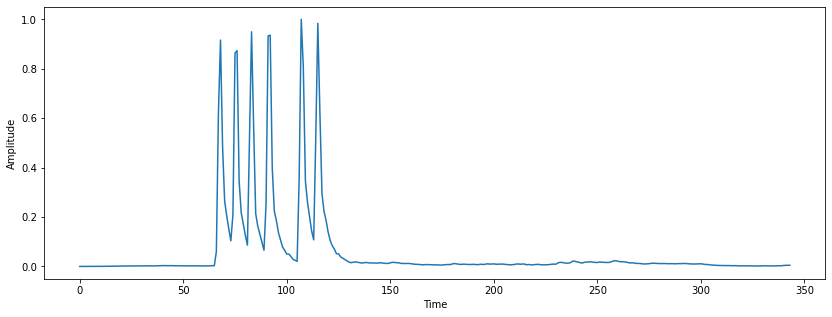

[ 8  7  9 16  7]
jgfduietfe.wav


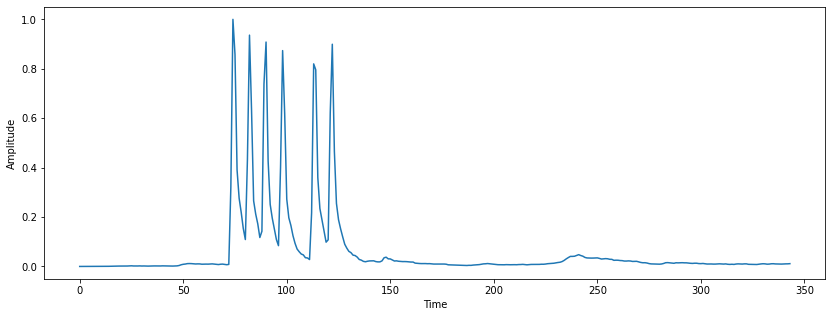

[ 8  7  9 15  8]


In [145]:
poly_features = []

for file in password_df['filename']:
    print(file)
    y, sr = librosa.load(f'data/Audio/{file}')
    difference_array = get_features(y, sr, plot=True)
    print(difference_array)
    

In [146]:
#play sound of each audio 
for file in password_df['filename']:
    print(file)
    y, sr = librosa.load(f'data/Audio/{file}')
    display(Audio(y, rate=sr))

hescmblism.wav


ieczqropvh.wav


jgfduietfe.wav


In [163]:
# Find 2 most similar audio files forr each common label

# get list of common labels
common_labels = df['label'].value_counts().index.tolist()

# get list of filenames for each common label
common_filenames = []

for label in common_labels:
    common_filenames.append(df[df['label'] == label]['filename'].tolist())


files = common_filenames[0]

diff_list = []

for file in files:
    y, sr = librosa.load(f'data/Audio/{file}')
    difference_array = get_features(y, sr)
    diff_list.append(difference_array)

combos = list(combinations(files, 2))

combos

# get cosine similarity for each pair of audio files
cosine_similarities = []

for combo in combos:
    y1, sr1 = librosa.load(f'data/Audio/{combo[0]}')
    y2, sr2 = librosa.load(f'data/Audio/{combo[1]}')
    difference_array1 = get_features(y1, sr1)
    difference_array2 = get_features(y2, sr2)
    cosine_similarities.append(cosine_similarity([difference_array1], [difference_array2]))


# get highest cosine similarity and corresponding audio files
max_index = np.argmax(cosine_similarities)

# get audio files with highest cosine similarity
combos[max_index], cosine_similarities[max_index]



(('qvevekybnq.wav', 'cskyaempjh.wav'), array([[0.99961118]]))